In [1]:
import warnings

from move.data import io
from move.tasks import analyze_latent

# Ignore plotting warnings
warnings.filterwarnings("ignore")

## Latent space analysis

This notebook runs part of the Multi-Omics Variational autoEncoder (MOVE) framework for training the model to integrate the data into a latent space, plotting the results, and analyze the important variables for the integration.

As in previous examples, first we need to read our configuration files and then we can run the `analyze_latent` task.

In [2]:
config = io.read_config("random_small", "random_small__latent")

The task will create the following visualizations:

- **Loss curve** shows the overall loss, KLD term, binary cross-entropy term,
and sum of squared errors term over number of training epochs.

- **Reconstructions metrics boxplot** shows a score (accuracy or cosine 
similarity for categorical and continuous datasets, respectively) per 
reconstructed dataset.

- **Latent space scatterplot** shows a reduced representation of the latent
space. To generate this visualization, the latent space is reduced to two
dimensions using TSNE (or another user-defined algorithm, e.g., UMAP).

- **Feature importance swarmplot** displays the impact perturbing a feature has
on the latent space.

[INFO  - analyze_latent]: Beginning task: analyze latent space
[INFO  - analyze_latent]: Generating visualizations
[INFO  - analyze_latent]: Projecting into latent space
[INFO  - analyze_latent]: Reconstructing
[INFO  - analyze_latent]: Computing reconstruction metrics
[INFO  - analyze_latent]: Computing feature importance


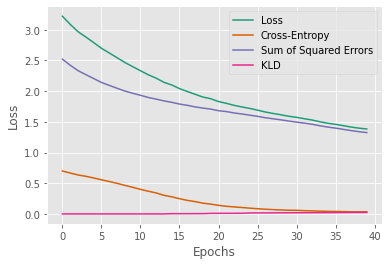

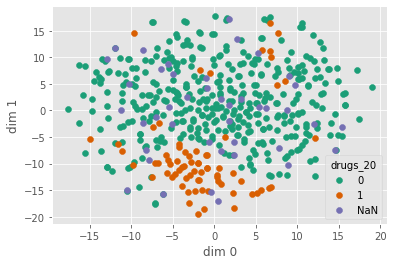

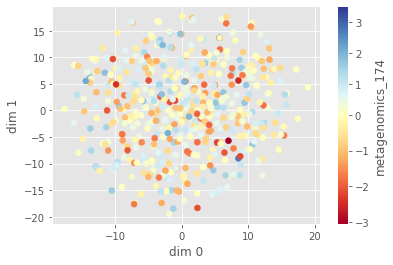

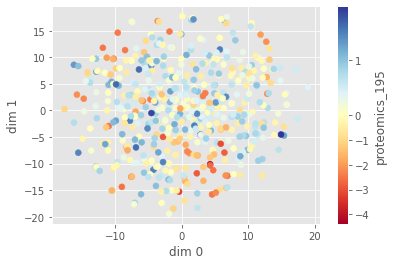

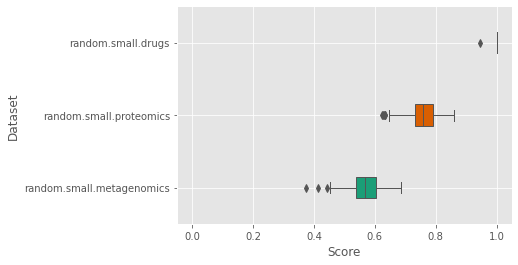

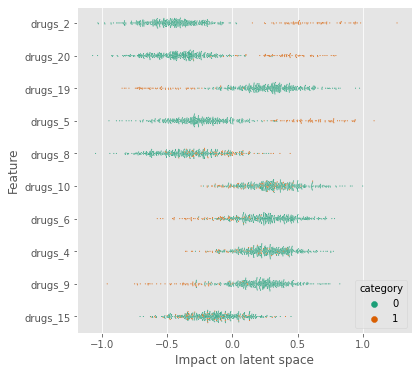

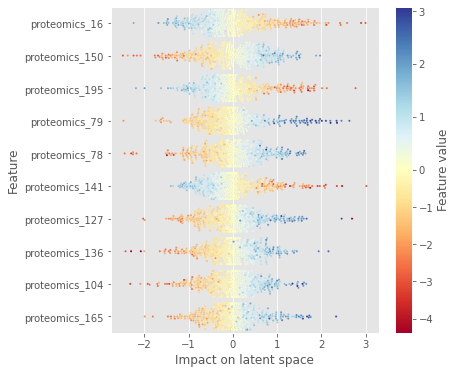

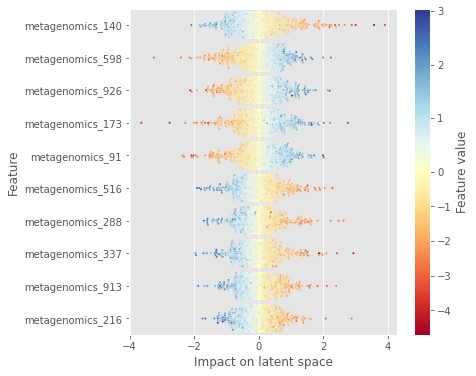

In [3]:
analyze_latent(config)

The plots and the data used to generate them are saved in the results folder,
so users can load that and generate different visualizations if need be.

In [4]:
from pathlib import Path

import pandas as pd
import seaborn as sns

results_path = Path(config.data.processed_data_path) / "latent_space"

print("Saved plot files:")
for plot_path in results_path.glob("*.png"):
    print("- " + plot_path.stem)

Saved plot files:
- feat_importance_random.small.drugs
- feat_importance_random.small.metagenomics
- feat_importance_random.small.proteomics
- latent_space_drugs_20
- latent_space_metagenomics_174
- latent_space_proteomics_195
- loss_curve
- reconstruction_metrics


Every image file has a corresponding TSV file.

In [5]:
df = pd.read_csv(results_path / "loss_curve.tsv", sep="\t")
df.head()

,epoch,Loss,Cross-Entropy,Sum of Squared Errors,KLD
0,0,3.220607,0.699202,2.521405,0.0
1,1,3.088549,0.666069,2.422481,0.0
2,2,2.969023,0.634462,2.334561,0.0
3,3,2.882171,0.612870,2.269301,0.0
4,4,2.791904,0.585777,2.206126,0.0


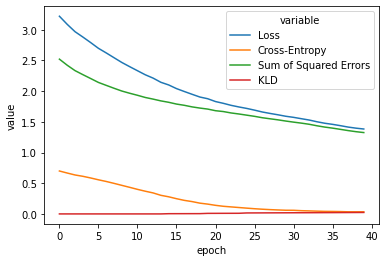

In [6]:
plot_data = df.melt(["epoch"], df.columns[1:])
_ = sns.lineplot(plot_data, x="epoch", y="value", hue="variable")